# Name:- Ankush Dey
#Roll No:- MDS202108 

### $\color{yellow}{\text{7. We want to find a homography that maps image1.jpg to image2.jpg }}$

In [1]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
image1 = cv2.imread('image1.jpg',1)
image2 = cv2.imread('image2.jpg',1)
image3 = cv2.imread('image3.jpg',1)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

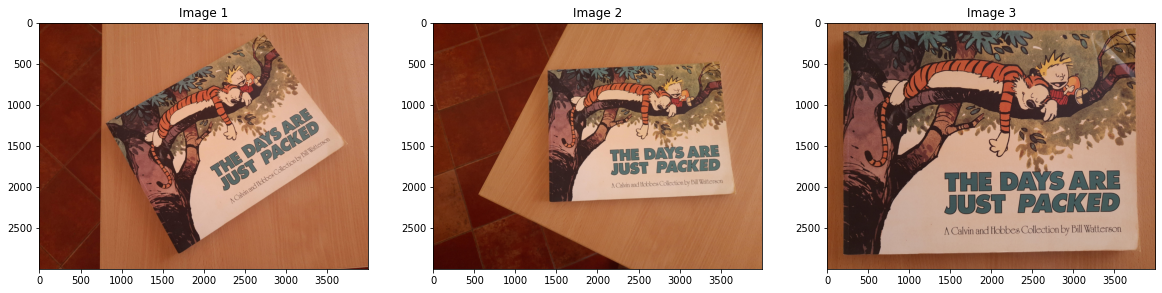

In [3]:
fig, axs = plt.subplots(1,3, figsize = (20, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1')

axs[1].imshow(image2)
axs[1].set_title("Image 2")

axs[2].imshow(image3)
axs[2].set_title("Image 3")
plt.show()

In [4]:
image1.shape,image2.shape,image3.shape

((3000, 4000, 3), (3000, 4000, 3), (3000, 4000, 3))

### $\color{yellow}{\text{(a) For this, select sets of four point correspondences on the two images, store them in two arrays called pts1}}$
### $\color{yellow}{\text{and pts2 respectively. Display these arrays clearly.}}$

In [5]:
# this Co_ordinates are corner points of the book, I got this co-ordinates using Paint software in my PC.
source_point = np.array([[809, 1229], [2729, 121], [1697, 2813], [3749, 1481]])
destination_point = np.array([[1397, 589], [3483, 477], [1419, 2181], [3687, 2087]])

In [6]:
print("Source point from Image1 = ",source_point)
print("destination point from Image2 = ",destination_point)

Source point from Image1 =  [[ 809 1229]
 [2729  121]
 [1697 2813]
 [3749 1481]]
destination point from Image2 =  [[1397  589]
 [3483  477]
 [1419 2181]
 [3687 2087]]


### $\color{yellow}{\text{(b) Compute a homography that maps image1 to image2 using DLT (you may use the inbuilt SVD function}}$
### $\color{yellow}{\text{but not the inbuilt function for computing DLT or homography). The system of equations being used}}$
### $\color{yellow}{\text{to solve for elements of the homography must be clearly stated. What is the rank of the matrix of this system?}}$

In [7]:
def get_rows(x_s,x_d):
    row_1  = [0, 0, 0, -1*x_s[0], -1*x_s[1], -1*x_s[2], x_s[0]*x_d[1], x_s[1]*x_d[1], x_s[2]*x_d[1]]
    row_2 = [x_s[0], x_s[1], x_s[2], 0, 0, 0, -x_s[0]*x_d[0], -x_s[1]*x_d[0], -x_s[2]*x_d[0]]
    return(row_1,row_2)

In [8]:
A=[]
for i in range(4):
    pts_1 = list(source_point[i])+[1]
    pts_2 = list(destination_point[i])+[1]
    r_1 , r_2 = get_rows(pts_1,pts_2)
    A.append(r_1)
    A.append(r_2)
A = np.array(A) 
u, s, v = np.linalg.svd(A)
h_vector = v[-1,]    
H = h_vector.reshape((3,3))

In [9]:
print("The matrix corresponding to homography is given by:\n")
print(H)

The matrix corresponding to homography is given by:

[[-4.96927426e-04  2.55855999e-04 -8.66811074e-01]
 [-2.68034952e-04 -5.56694977e-04  4.98635552e-01]
 [ 1.71160009e-08 -1.89231397e-08 -6.73753040e-04]]


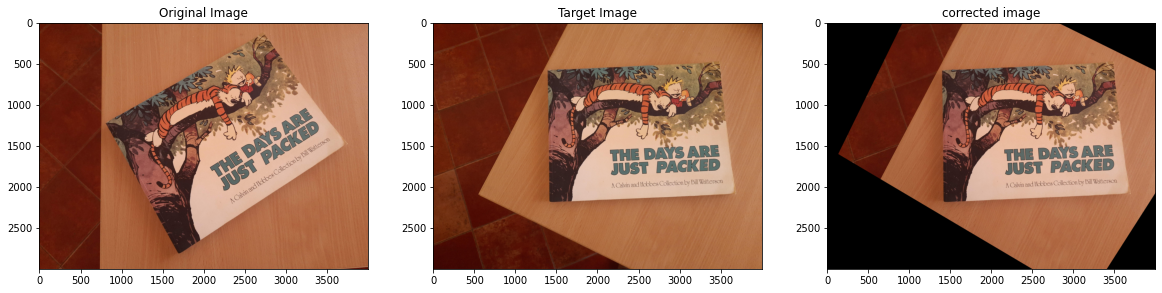

In [10]:
changed_image = cv2.warpPerspective(image1, H, (image2.shape[1],image2.shape[0]))
fig, axs = plt.subplots(1,3, figsize = (20, 6))
axs[0].imshow(image1)
axs[0].set_title('Original Image')

axs[1].imshow(image2)
axs[1].set_title("Target Image")

axs[2].imshow(changed_image)
axs[2].set_title("corrected image")
plt.show()

In [11]:
print(A)
print("\nThe rank of the matrix of this system is = ",np.linalg.matrix_rank(A))

[[        0         0         0      -809     -1229        -1    476501
     723881       589]
 [      809      1229         1         0         0         0  -1130173
   -1716913     -1397]
 [        0         0         0     -2729      -121        -1   1301733
      57717       477]
 [     2729       121         1         0         0         0  -9505107
    -421443     -3483]
 [        0         0         0     -1697     -2813        -1   3701157
    6135153      2181]
 [     1697      2813         1         0         0         0  -2408043
   -3991647     -1419]
 [        0         0         0     -3749     -1481        -1   7824163
    3090847      2087]
 [     3749      1481         1         0         0         0 -13822563
   -5460447     -3687]]

The rank of the matrix of this system is =  8


### $\color{yellow}{\text{(c) Compare your result with results of using the function findHomography in OpenCV.}}$

In [12]:
# computing the homography using the findHomography function
H1, _ = cv2.findHomography(source_point, destination_point)

In [13]:
print("The matrix corresponding to homography by findHomography function is given by:\n")
print(H1)

The matrix corresponding to homography by findHomography function is given by:

[[ 7.37551293e-01 -3.79747450e-01  1.28654124e+03]
 [ 3.97823737e-01  8.26259688e-01 -7.40086534e+02]
 [-2.54039683e-05  2.80861659e-05  1.00000000e+00]]


In [14]:
# Normalising the H1 to check similarity with H
print(H1/np.linalg.norm(H1))
print("\n\n")
print(H)

[[ 4.96927426e-04 -2.55855999e-04  8.66811074e-01]
 [ 2.68034952e-04  5.56694977e-04 -4.98635552e-01]
 [-1.71160009e-08  1.89231397e-08  6.73753040e-04]]



[[-4.96927426e-04  2.55855999e-04 -8.66811074e-01]
 [-2.68034952e-04 -5.56694977e-04  4.98635552e-01]
 [ 1.71160009e-08 -1.89231397e-08 -6.73753040e-04]]


#### Hence the matrix is H1 is scalar multiple of H

### $\color{yellow}{\text{(d) Observe how the homography affects the other parts of the image. Can you explain why?}}$

In [15]:
changed_image_1 = cv2.warpPerspective(image1, H1, (image2.shape[1],image2.shape[0]))

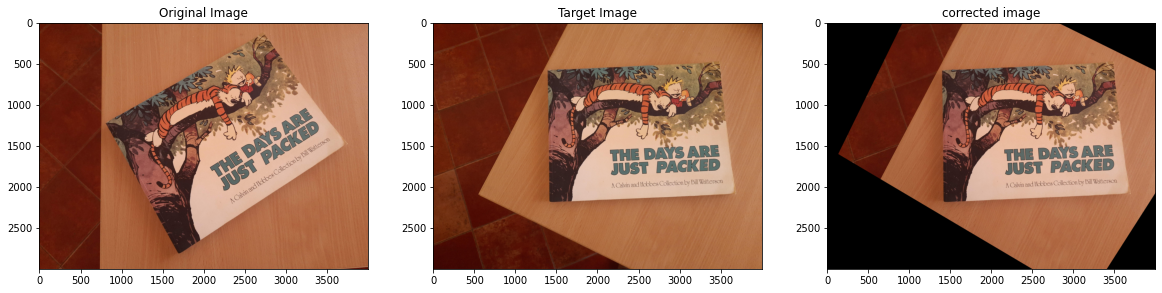

In [16]:
fig, axs = plt.subplots(1,3, figsize = (20, 6))
axs[0].imshow(image1)
axs[0].set_title('Original Image')

axs[1].imshow(image2)
axs[1].set_title("Target Image")

axs[2].imshow(changed_image_1)
axs[2].set_title("corrected image")
plt.show()

#### As we can see in the above two images, applying the homography on image1 has resulted in its 'rotation' or 'alignment' with image2, but a considerable amount of content (floor and table) of image1 is missing from the warped version, leaving black patches on the output. The reason being, the four points we had choses from image1, i.e. the source image, gets mapped on their corresponding points on image2 and along with that, all points from the image situated on the same plane undergo the same transformation. When we select a set of four (or more) points from the source image (here, image1), the plane on which these points reside in the real world gets aligned as the plane containing their four corresponding points in the destination image (here, image2). Thus, ALL points on that plane get aligned correctly as they are in the destinnation image. But the points that are NOT on that plane will NOT be aligned by the homography. These points get lost after the transformation leaving blank (black) pixels on the resulting picture. We can see from above that the 2 transformations using findHomography function and by implementing DLT algorithm  yield similar results. Since the homographies obtained are same , hence the transformed images also resembled each other.

### $\color{yellow}{\text{8. Use the code in the above exercise to find a homography that ‘straightens’ image1 as follows: you are given}}$
### $\color{yellow}{\text{that the aspect ratio (width/height) of the book is 30/23. Mark and store the 4 corner points of the book in}}$
### $\color{yellow}{\text{image1; choose 4 points in the destination image that you will map the chosen points to (keeping the aspect}}$
### $\color{yellow}{\text{ratio in mind). Then compute the homography and apply it to image1. The resulting image should be akin}}$
### $\color{yellow}{\text{to what is seen in image3.}}$

In [17]:
source_point_1 = np.array([[809, 1229], [2729, 121], [1697, 2813], [3749, 1481]])
destination_point_1 = np.array([[0, 0], [3000, 0], [0, 2300], [3000, 2300]])

In [18]:
A=[]
for i in range(4):
    pts_1 = list(source_point_1[i])+[1]
    pts_2 = list(destination_point_1[i])+[1]
    r_1 , r_2 = get_rows(pts_1,pts_2)
    A.append(r_1)
    A.append(r_2)
A = np.array(A) 
u, s, v = np.linalg.svd(A)
h_vector = v[-1,]    
H = h_vector.reshape((3,3))

In [19]:
print("The matrix corresponding to homography is given by:\n")
print(H)

The matrix corresponding to homography is given by:

[[ 5.34411356e-04 -2.99594245e-04 -6.41374598e-02]
 [ 3.39588599e-04  5.88456778e-04 -9.97940556e-01]
 [ 2.33300434e-09  3.19883374e-08  4.42436051e-04]]


Text(0.5, 1.0, 'Corrected Image')

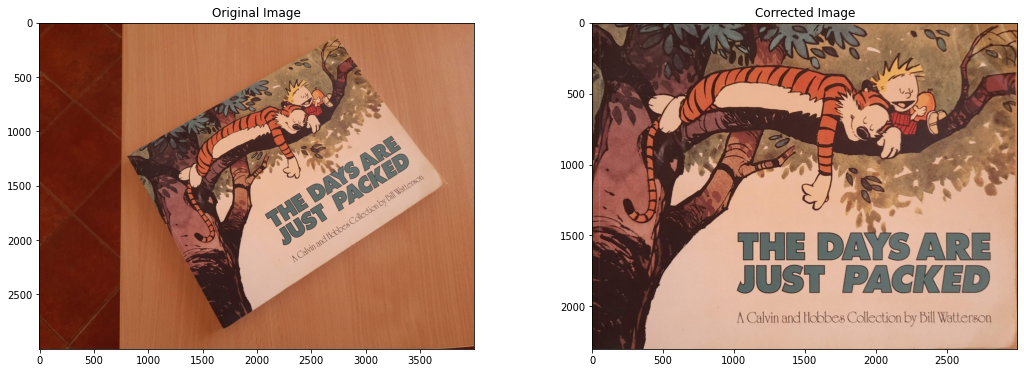

In [20]:
changed_image_2 = cv2.warpPerspective(image1, H, (3000, 2300))
fig, axs = plt.subplots(1,2, figsize = (18, 6))
axs[0].imshow(image1)
axs[0].set_title('Original Image')

axs[1].imshow(changed_image_2)
axs[1].set_title("Corrected Image")


### $\color{yellow}{\text{9. Find at least two different use cases of a homography and demonstrate these cases using either the given}}$
### $\color{yellow}{\text{image or your own images.}}$

#### i) Perspective correction
We adjust the images to look like the desired image by choosing points of correspondence as shown above in 1.b and 1.c

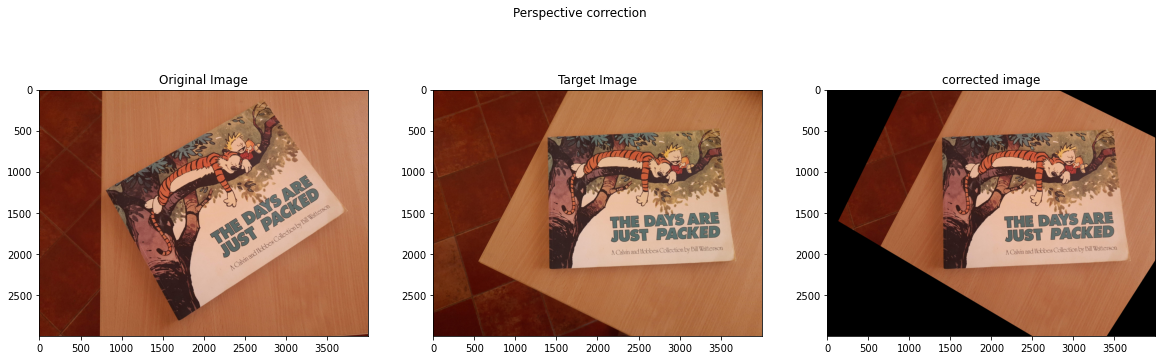

In [21]:
fig, axs = plt.subplots(1,3, figsize = (20, 6))
axs[0].imshow(image1)
axs[0].set_title('Original Image')

axs[1].imshow(image2)
axs[1].set_title("Target Image")

axs[2].imshow(changed_image)
axs[2].set_title("corrected image")
plt.suptitle("Perspective correction")
plt.show()


### ii) Extraction and magnification of part of an image: 
We can extract a part of the image and post straightening, display it as a new image, as seen above in 2.

Text(0.5, 0.98, 'Magnification of image')

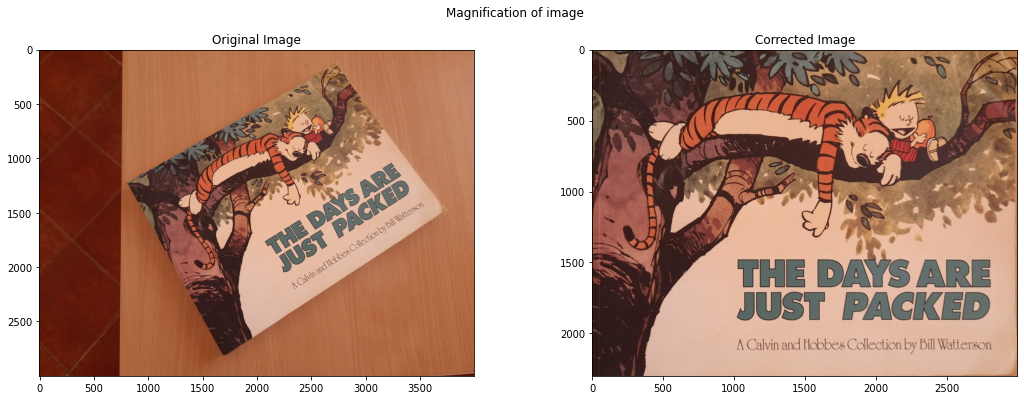

In [22]:
fig, axs = plt.subplots(1,2, figsize = (18, 6))
axs[0].imshow(image1)
axs[0].set_title('Original Image')

axs[1].imshow(changed_image_2)
axs[1].set_title("Corrected Image")
plt.suptitle("Magnification of image")

### iii) Changing A Part Of The Image with Another Image 

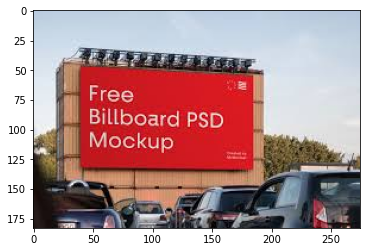

In [23]:
src = cv2.imread('billboard.jpg',1)
bill_image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(bill_image)

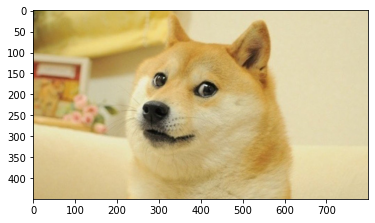

In [24]:
d = cv2.imread('doge.jpg',1)
d_img = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
plt.imshow(d_img)

In [25]:
pt_src = np.array([[0, 0], [800, 0], [0, 450], [800, 450]])
pt_dest = np.array([[40,47], [186,55], [39,132], [185,134]])
A=[]
for i in range(4):
    pts_1 = list(pt_src[i])+[1]
    pts_2 = list(pt_dest[i])+[1]
    r_1 , r_2 = get_rows(pts_1,pts_2)
    A.append(r_1)
    A.append(r_2)
A = np.array(A) 
u, s, v = np.linalg.svd(A)
h_vector = v[-1,]    
H = h_vector.reshape((3,3))
img_billboard = cv2.warpPerspective(d_img, H, (bill_image.shape[1],bill_image.shape[0]))

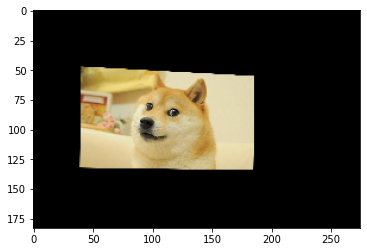

In [26]:
plt.imshow(img_billboard)

In [27]:
modified_img = np.zeros((bill_image.shape[0], bill_image.shape[1], bill_image.shape[2]), np.uint8)
for i in range(bill_image.shape[0]):
    for j in range(bill_image.shape[1]):
        for k in range(bill_image.shape[2]):
            if img_billboard[i][j][k] != 0:
                modified_img[i][j][k] = img_billboard[i][j][k]
            else:
                modified_img[i][j][k] = bill_image[i][j][k]

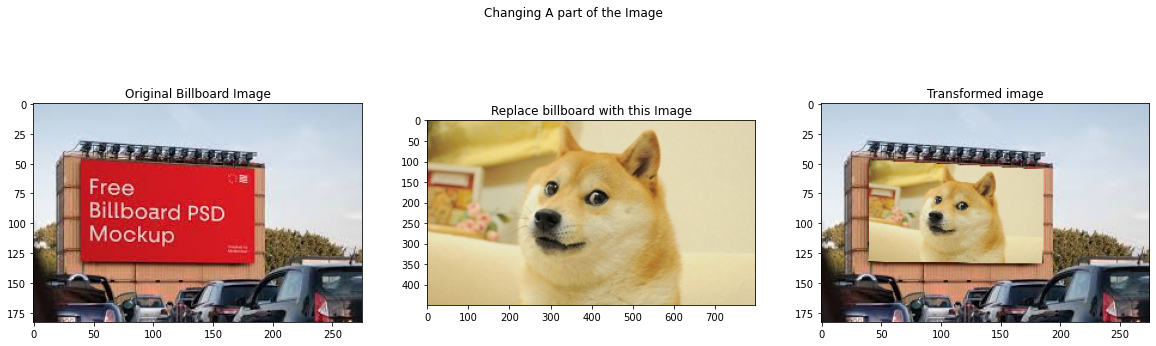

In [28]:
fig, axs = plt.subplots(1,3, figsize = (20, 6))
axs[0].imshow(bill_image)
axs[0].set_title('Original Billboard Image')

axs[1].imshow(d_img)
axs[1].set_title("Replace billboard with this Image")

axs[2].imshow(modified_img)
axs[2].set_title("Transformed image")
plt.suptitle("Changing A part of the Image")
plt.show()